In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sentiments = pd.read_csv("tweets1.csv")
sentiments.head()

,ID,Sentiment Score,Date,Country
0,1.250000e+18,-0.15625,04-10-2020,US
1,1.250000e+18,0.00000,04-10-2020,NP
2,1.250000e+18,0.01500,04-10-2020,IL
3,1.250000e+18,0.00000,04-10-2020,US
4,1.250000e+18,-0.25000,04-10-2020,US


In [3]:
sentiments.loc[sentiments['Sentiment Score'] >= 0.2, 'Category'] = 'Positive'
sentiments.loc[sentiments['Sentiment Score'] < 0.2, 'Category'] = 'Negative'

In [4]:
sentiments.head()

,ID,Sentiment Score,Date,Country,Category
0,1.250000e+18,-0.15625,04-10-2020,US,Negative
1,1.250000e+18,0.00000,04-10-2020,NP,Negative
2,1.250000e+18,0.01500,04-10-2020,IL,Negative
3,1.250000e+18,0.00000,04-10-2020,US,Negative
4,1.250000e+18,-0.25000,04-10-2020,US,Negative


<AxesSubplot:xlabel='Country', ylabel='count'>

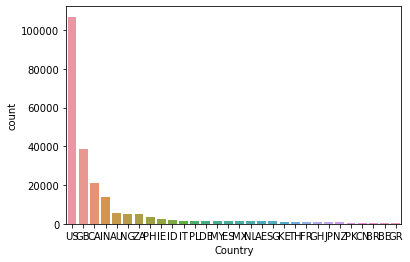

In [5]:
countries = sentiments['Country']
sns.countplot(x="Country", data=sentiments, order=pd.value_counts(sentiments['Country']).iloc[:30].index)

In [6]:
countries.unique()

array(['US', 'NP', 'IL', nan, 'IN', 'GH', 'KE', 'CN', 'SE', 'PK', 'NL',
       'ZA', 'GB', 'BY', 'BR', 'DK', 'DE', 'IE', 'FR', 'IT', 'JP', 'KR',
       'AU', 'TR', 'NG', 'PL', 'RU', 'HU', 'ES', 'CH', 'TH', 'AE', 'PT',
       'FI', 'YE', 'ID', 'OM', 'BW', 'MX', 'CA', 'GR', 'BE', 'MY', 'BD',
       'JM', 'EG', 'EC', 'MA', 'VA', 'CM', 'ZW', 'NZ', 'LB', 'QA', 'SI',
       'VN', 'LK', 'KW', 'HR', 'TN', 'IR', 'IQ', 'TZ', 'PH', 'KH', 'RW',
       'SA', 'AT', 'SG', 'MG', 'PA', 'MC', 'SR', 'SL', 'WS', 'BS', 'MZ',
       'SC', 'ZM', 'AQ', 'HK', 'CL', 'UG', 'BG', 'BT', 'CY', 'GL', 'MO',
       'RS', 'TO', 'DZ', 'NO', 'BO', 'LS', 'JO', 'XK', 'GE', 'RO', 'BB',
       'AR', 'SK', 'ET', 'MW', 'SO', 'BH', 'PG', 'TT', 'LT', 'LV', 'DO',
       'BJ', 'UA', 'VE', 'CR', 'PE', 'UY', 'EE', 'CG', 'CZ', 'SY', 'CO',
       'LU', 'ME', 'GY', 'SN', 'SZ', 'MU', 'MM', 'GT', 'GP', 'GU', 'TL',
       'CD', 'CW', 'KP', 'TG', 'SV', 'LR', 'PR', 'CI', 'BM', 'ML', 'MT',
       'TW', 'GD', 'BN', 'GF', 'AO', 'NI', 'BZ', 'AM

In [7]:
sentiments.Date = pd.to_datetime(sentiments.Date)
df = sentiments.groupby(['Country', pd.Grouper(key='Date', freq='W-MON')])['Sentiment Score']\
        .mean()\
        .reset_index()\
        .sort_values('Date')

In [8]:
df_pos = sentiments.loc[sentiments['Category'] == 'Positive']\
        .groupby(['Country', pd.Grouper(key='Date', freq='W-MON')])['ID']\
        .count()\
        .reset_index()\
        .sort_values('Date')

In [9]:
df_pos.columns = ['Country', 'Date', 'Positive']
df_pos.head()

,Country,Date,Positive
258,BJ,2020-03-23,1
281,BR,2020-03-23,10
2567,US,2020-03-23,420
435,CH,2020-03-23,5
1081,HT,2020-03-23,1


In [10]:
df_neg = sentiments.loc[sentiments['Category'] == 'Negative']\
        .groupby(['Country', pd.Grouper(key='Date', freq='W-MON')])['ID']\
        .count()\
        .reset_index()\
        .sort_values('Date')

In [11]:
df_neg.columns = ['Country', 'Date', 'Negative']
df_neg.head()

,Country,Date,Negative
2145,MY,2020-03-23,5
1639,JP,2020-03-23,8
1625,JO,2020-03-23,1
325,BJ,2020-03-23,1
1590,JM,2020-03-23,6


In [12]:
df_final = pd.merge(pd.merge(df, df_pos, on=['Country', 'Date']), df_neg, on=['Country', 'Date'])

In [13]:
df_final.head()

,Country,Date,Sentiment Score,Positive,Negative
0,SG,2020-03-23,0.001042,1,3
1,BE,2020-03-23,0.044697,1,11
2,PH,2020-03-23,0.109584,6,8
3,NZ,2020-03-23,0.088574,2,8
4,GH,2020-03-23,0.018486,2,11


In [14]:
df_final['ratio'] = df_final['Positive']/df_final['Negative']
df_final.size

13302

In [15]:
df_final.to_csv('final_op_sentiments_weekly.csv', index=False)

## Daily Sentiment Extraction

In [16]:
df = sentiments.groupby(['Country', 'Date'])['Sentiment Score']\
        .mean()\
        .reset_index()\
        .sort_values('Date')

In [17]:
df_pos = sentiments.loc[sentiments['Category'] == 'Positive']\
        .groupby(['Country', 'Date'])['ID']\
        .count()\
        .reset_index()\
        .sort_values('Date')

In [18]:
df_pos.columns = ['Country', 'Date', 'Positive']
df_pos.head()

,Country,Date,Positive
7357,ZA,2020-03-21,1
3758,JM,2020-03-21,1
7560,ZM,2020-03-21,1
3981,KE,2020-03-21,3
4893,NG,2020-03-21,17


In [19]:
df_neg = sentiments.loc[sentiments['Category'] == 'Negative']\
        .groupby(['Country', 'Date'])['ID']\
        .count()\
        .reset_index()\
        .sort_values('Date')
df_neg.columns = ['Country', 'Date', 'Negative']
df_neg.head()

,Country,Date,Negative
2289,CV,2020-03-21,1
358,AT,2020-03-21,3
9386,SR,2020-03-21,1
3935,GU,2020-03-21,1
7460,NP,2020-03-21,1


In [20]:
df_final = pd.merge(pd.merge(df, df_pos, on=['Country', 'Date']), df_neg, on=['Country', 'Date'])

In [21]:
df_final['ratio'] = df_final['Positive']/df_final['Negative']
df_final.size

33858

In [22]:
df_final.to_csv('final_op_sentiments_daily.csv', index=False)